### Simple Linear Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

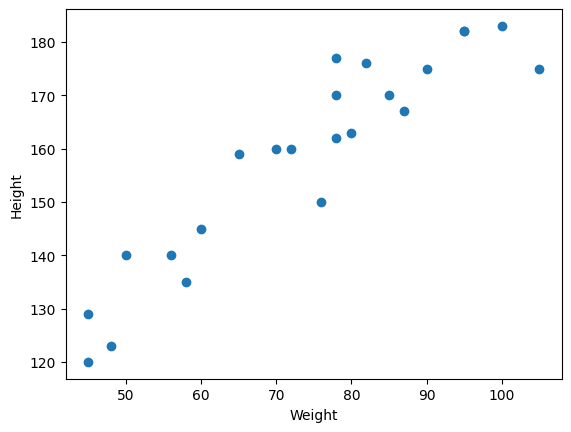

In [3]:
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
# Divide our dataset into independent and dependent edatures
X = df[["Weight"]]  # independent feature
y = df["Height"]  # dependent feature

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [6]:
X.shape

(23, 1)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [8]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

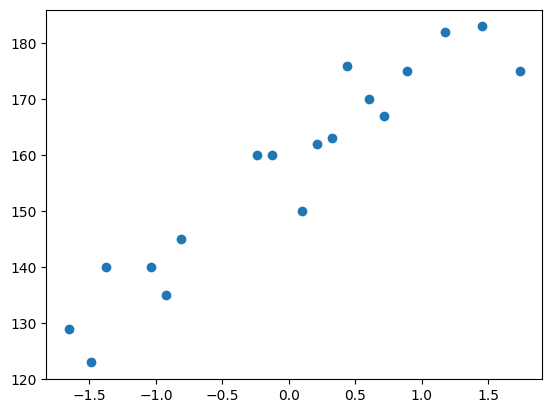

In [11]:
plt.scatter(X_train, y_train)

In [12]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
print("The slope or coefficient of weight is", regressor.coef_)
print("Intercept:", regressor.intercept_)

The slope or coefficient of weight is [17.03440872]
Intercept: 157.5


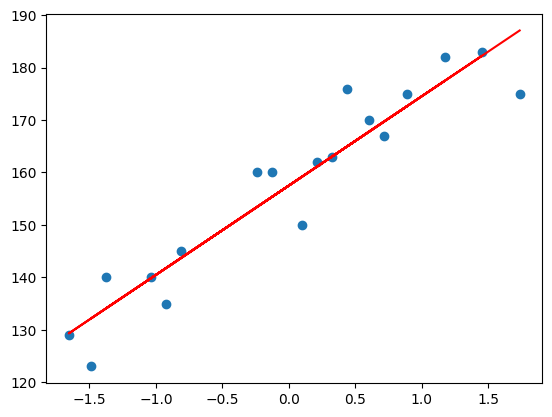

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), "r")

### Prediction of train data

1. predicted height output = intercept +coef\_(Weights)
2. y_pred_train = 157.5 + 17.03(X_train)

### Prediction of test data

1. predicted height output = intercept +coef\_(Weights)
2. y_pred_test = 157.5 + 17.03(X_test)


In [17]:
y_pred_test = regressor.predict(X_test)

In [18]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

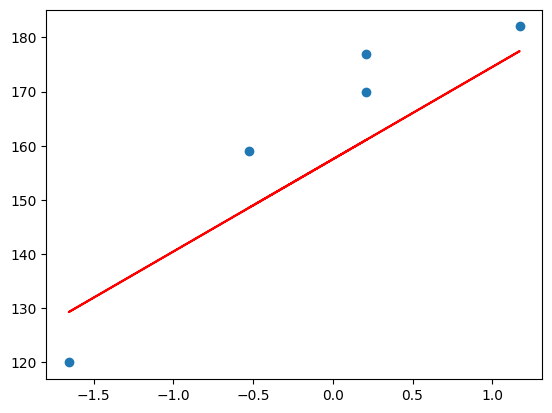

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regressor.predict(X_test), "r")

### Performance Metrics

#### MSE,MAE,RMSE

#### R square and adjusted R square


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## R square

Formula

**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination
SSR = sum of squares of residuals
SST = total sum of squares


In [22]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred_test)

In [23]:
score

0.776986986042344

### Adjusted R Square


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables


In [24]:
# Display adjusted R-square
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

0.7026493147231252

In [25]:
regressor

LinearRegression()

In [26]:
# New data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

c:\Users\ribhav.jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [27]:
scaled_weight[0]

array([0.32350772])

In [28]:
print(
    "The height prediction for weight 80 kg is :", regressor.predict([scaled_weight[0]])
)

The height prediction for weight 80 kg is : [163.01076266]


### Assumptions


Text(0.5, 1.0, 'Actual vs Predicted Heights')

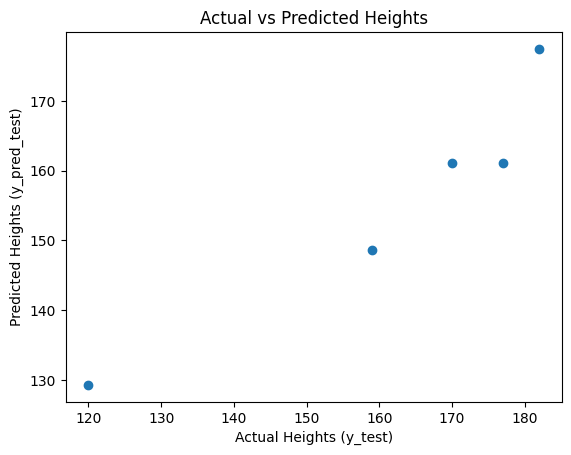

In [29]:
# Plot a scatter plot for the prediction
# This plot helps to visualize the relationship between the actual values (y_test) and the predicted values (y_pred_test).

# Ideally, the points should lie close to a straight line, indicating a good fit.

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Heights (y_test)")
plt.ylabel("Predicted Heights (y_pred_test)")
plt.title("Actual vs Predicted Heights")

In [30]:
# Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

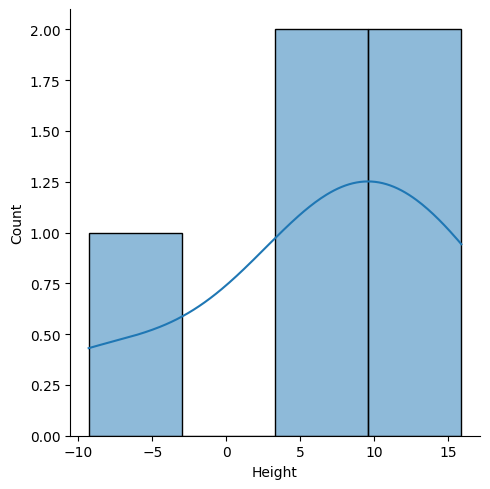

In [31]:
# Plot residuals
# Assumption: In linear regression, residuals should be normally distributed with a mean of zero.

import seaborn as sns

sns.displot(residuals, kde=True)

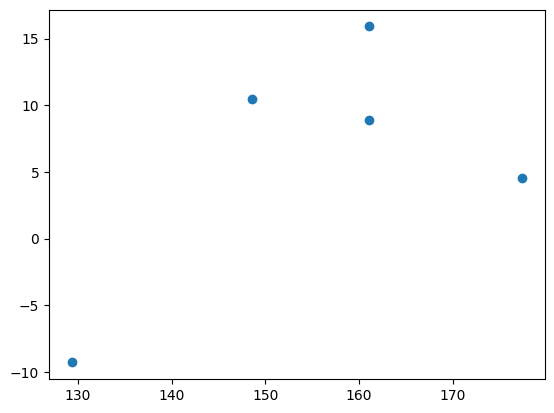

In [32]:
# Scatter plot with respect to prediction and residuals
# Assumption: In linear regression, residuals should be uniformly distributed around zero.
plt.scatter(y_pred_test, residuals)